# Resources:


*   https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/
*   https://jitm.ut.ac.ir/article_80028.html

*   https://towardsdatascience.com/complete-guide-to-perform-classification-of-tweets-with-spacy-e550ee92ca79?gi=7494f25db237 (not used)
*   https://github.com/kroudir/Twitter-Sentiment-Analysis-with-python/blob/master/Project_notebook.ipynb

* https://www.kaggle.com/code/pierremegret/gensim-word2vec-tutorial





# ⏬ Importing & Installing Modules

In [122]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

# 📖 Read Dataset & CSV files

In [ ]:
path = ''

The faced challenge:

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 60340: invalid continuation byte

In [ ]:
df_train = pd.read_csv(path + 'twitter_training.csv', encoding='ISO-8859-1')

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
df_train.head(20)

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [ ]:
df_test = pd.read_csv(path + 'twitter_test.csv', encoding='ISO-8859-1')

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       500 non-null    int64 
 1   entity         500 non-null    object
 2   sentiment      500 non-null    object
 3   Tweet content  500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [ ]:
df_test.head()

,Tweet ID,entity,sentiment,Tweet content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [213]:
df_valid = pd.read_csv(path + 'twitter_validation.csv', encoding='ISO-8859-1')

df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       500 non-null    int64 
 1   entity         500 non-null    object
 2   sentiment      500 non-null    object
 3   Tweet content  500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [ ]:
df_valid.head()

,Tweet ID,entity,sentiment,Tweet content
0,5328,Hearthstone,Negative,@BlizzardCS whatâs going on with Hearthstone...
1,7618,MaddenNFL,Negative,@EAMaddenNFL is there a reason OFFLINE franchi...
2,7108,johnson&johnson,Negative,Johnson & Johnson is about to enter phase 3 tr...
3,10008,PlayerUnknownsBattlegrounds(PUBG),Negative,How is banning #PUBG going to fix anything? Al...
4,49,Amazon,Neutral,I played this interesting quiz on Amazon - Try...


In [ ]:
df_train.shape

(74682, 4)

In [ ]:
np.sum(df_train.isnull().any(axis=1)) # For tweet_content column -> 74682 - 73996

686

In [146]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       73996 non-null  int64 
 1   entity         73996 non-null  object
 2   sentiment      73996 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [ ]:
df_train.dropna(subset=['Tweet content'], inplace=True)

In [ ]:
df_train['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

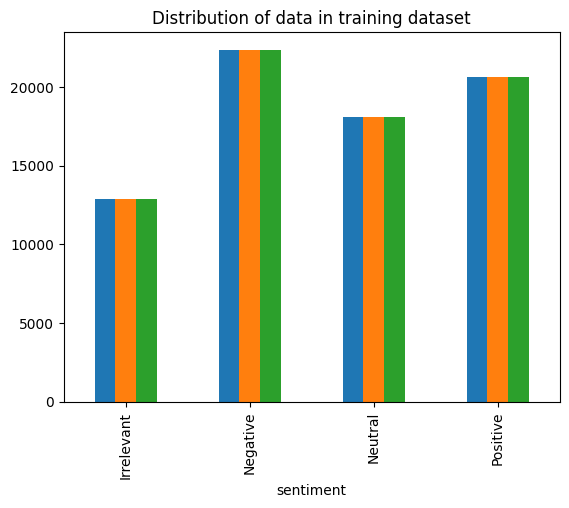

In [ ]:
# Plotting the distribution for dataset.
ax = df_train.groupby('sentiment').count().plot(kind='bar', title='Distribution of data in training dataset',legend=False)
# Storing data in lists.
text, sentiment = list(df_train['Tweet content']), list(df_train['sentiment'])

<Axes: xlabel='sentiment', ylabel='count'>

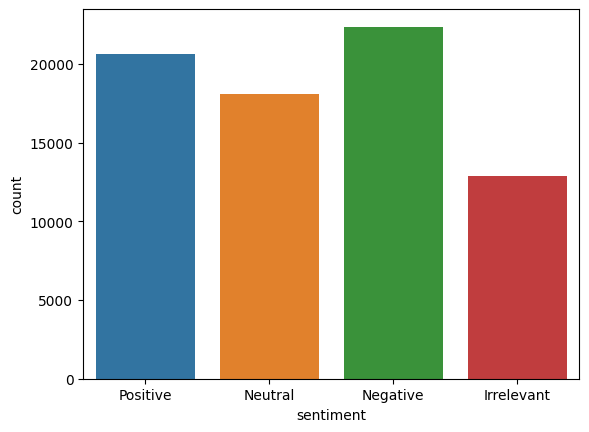

In [ ]:
sns.countplot(x='sentiment', data=df_train)

# ➕ Appending validation and test set to train

In [90]:
combi = df_train.append(df_test, ignore_index=True)
combi.shape

<ipython-input-90-c8539605bf3d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = df_train.append(df_test, ignore_index=True)


(74496, 4)

In [91]:
combi = combi.append(df_valid, ignore_index=True)
combi.shape

<ipython-input-91-348625c2fd33>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = combi.append(df_valid, ignore_index=True)


(74996, 4)

In [147]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74996 entries, 0 to 74995
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74996 non-null  int64 
 1   entity         74996 non-null  object
 2   sentiment      74996 non-null  object
 3   Tweet content  74996 non-null  object
 4   tidy_tweet     74996 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [92]:
combi.head(-10)

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74981,10588,RedDeadRedemption(RDR),Neutral,@6th__man playing red dead redemption-\n\nâO...
74982,3980,Cyberpunk2077,Positive,This looks like a poster for a 90s action movi...
74983,4905,GrandTheftAuto(GTA),Irrelevant,The ultimate pruning machine! @stihlusa GTA 26...
74984,7516,LeagueOfLegends,Neutral,â¥ï¸ Suikoden 2\n1ï¸â£ Alex Kidd in Miracl...


In [93]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74996 entries, 0 to 74995
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74996 non-null  int64 
 1   entity         74996 non-null  object
 2   sentiment      74996 non-null  object
 3   Tweet content  74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


# 🧹 Pre-processing

```
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':-)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [': )']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':)']
```



In [94]:
def remove_pattern(input_txt, pattern, new_text, opt="replace"):
    r = re.findall(pattern, input_txt)
    if len(r) > 0:
      print(f"The finded item to be replaced for the given pattern {pattern} is: {r}")
    if opt == "replace":
      for i in r:
        input_txt = re.sub(re.escape(i), new_text, input_txt)
    if opt == "remove":
      for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt

To solve the challenge:

https://stackoverflow.com/questions/15947140/python-regex-error-unbalanced-parenthesis

## For smile emoticons → replace them with "simle"

In [95]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['Tweet content'],
                                                   "(:\s?\)|:-\)|\(\s?:|\(-:|:\’\))",
                                                   new_text="smile",
                                                   opt="replace")
combi['tidy_tweet'].head(10)

The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':-)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [':)']
The finded item to be replaced for the given pattern (:\s?\)|:-\)|\(\s?:|\(-:|:\’\)) is: [': )']
The finded item to be replaced for the

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: tidy_tweet, dtype: object



```
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [': D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [':D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: ['xD']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: ['XD']
```



## For laughter emoticons → replace them with "laugh"

In [96]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'],
                                                   "(:\s?D|:-D|x-?D|X-?D)",
                                                   new_text="laugh",
                                                   opt="replace")
combi['tidy_tweet'].head(10)

The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [': D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [':D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [': D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [': D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [':D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [': D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [':D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [': D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [': D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [':D']
The finded item to be replaced for the given pattern (:\s?D|:-D|x-?D|X-?D) is: [': D']
The finded item to be replaced for the given pa

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: tidy_tweet, dtype: object

Nothing was found...

## For love emoticons → replace them with "love"

In [97]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'],
                                                   "(<3|:\*)",
                                                   new_text="love",
                                                   opt="replace")
combi['tidy_tweet'].head(10)

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: tidy_tweet, dtype: object



```
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [':(']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [': (']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: ['):']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [') :']
```



## For sadness emoticons → replace them with "sad"

In [98]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'],
                                                   "(:\s?\(|:-\(|\)\s?:|\)-:)",
                                                   new_text="sad",
                                                   opt="replace")
combi['tidy_tweet'].head(10)

The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: ['):']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: ['):']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: ['):']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: ['):']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [') :']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: ['):']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [':(']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [': (']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [': (']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [':(']
The finded item to be replaced for the given pattern (:\s?\(|:-\(|\)\s?:|\)-:) is: [': (']
The fi

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: tidy_tweet, dtype: object



```
The finded item to be replaced for the given pattern (:,\(|:\’\(|:"\() is: [':,(']
```



## For crying emoticons → replace them with "cry"

In [99]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'],
                                                   """(:,\(|:\’\(|:"\()""",
                                                   new_text="cry",
                                                   opt="replace")
combi['tidy_tweet'].head(10)

The finded item to be replaced for the given pattern (:,\(|:\’\(|:"\() is: [':,(']
The finded item to be replaced for the given pattern (:,\(|:\’\(|:"\() is: [':,(']
The finded item to be replaced for the given pattern (:,\(|:\’\(|:"\() is: [':,(']


0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: tidy_tweet, dtype: object

Nothing was found...

## For wink emoticons → replace them with "wink"

In [100]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'],
                                                   "(:\s?\(|:-\(|\)\s?:|\)-:)",
                                                   new_text="wink",
                                                   opt="replace")
combi['tidy_tweet'].head(10)

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: tidy_tweet, dtype: object

## remove the tagged names

In [101]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'], "@[\w]*", '', opt="replace")
combi['tidy_tweet'].head(10)

Streaming output truncated to the last 5000 lines.
The finded item to be replaced for the given pattern @[\w]* is: ['@']
The finded item to be replaced for the given pattern @[\w]* is: ['@']
The finded item to be replaced for the given pattern @[\w]* is: ['@Rainbow6Game']
The finded item to be replaced for the given pattern @[\w]* is: ['@']
The finded item to be replaced for the given pattern @[\w]* is: ['@']
The finded item to be replaced for the given pattern @[\w]* is: ['@Rainbow6Game']
The finded item to be replaced for the given pattern @[\w]* is: ['@Rainbow6Game']
The finded item to be replaced for the given pattern @[\w]* is: ['@Rainbow6Game']
The finded item to be replaced for the given pattern @[\w]* is: ['@Rainbow6Game']
The finded item to be replaced for the given pattern @[\w]* is: ['@']
The finded item to be replaced for the given pattern @[\w]* is: ['@']
The finded item to be replaced for the given pattern @[\w]* is: ['@Rainbow6Game']
The finded item to be replaced for th

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: tidy_tweet, dtype: object

## Removing Short words

We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [102]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In the article it is said that the hashtags are better to be removed, but in the github link the opposite is said...

## Removing hashtags

In [103]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'], "#(\S+)", '', opt="replace")
combi['tidy_tweet'].head(10)

The finded item to be replaced for the given pattern #(\S+) is: ['Browns']
The finded item to be replaced for the given pattern #(\S+) is: ['stream', 'twitch', 'RocketLeague', 'SeaOfThieves', 'RainbowSixSiege', 'follow']
The finded item to be replaced for the given pattern #(\S+) is: ['TCCGif', 'AssassinsCreedBlackFlag', 'AssassinsCreed', 'TheCapturedCollective']
The finded item to be replaced for the given pattern #(\S+) is: ['Warzone', 'COD', 'CallofDuty', 'Warzone']
The finded item to be replaced for the given pattern #(\S+) is: ['gtc20']
The finded item to be replaced for the given pattern #(\S+) is: ['COVID19']
The finded item to be replaced for the given pattern #(\S+) is: ['update', 'overwatchleague', 'nyxl', 'overwatch', 'overwatch2', 'blizzard', 'games', 'lockdown']
The finded item to be replaced for the given pattern #(\S+) is: ['pubg', 'pubgmobile', 'pubgkenya']
The finded item to be replaced for the given pattern #(\S+) is: ['COVID19', 'vaccine...', 'Glaxosmithkline']
The f

0                      getting borderlands will murder
1                        coming borders will kill all,
2                   getting borderlands will kill all,
3                  coming borderlands will murder all,
4                 getting borderlands will murder all,
5                 getting into borderlands murder all,
6    spent hours making something fun. don't know H...
7    spent couple hours doing something fun... don'...
8    spent hours doing something fun... don't know ...
9    spent hours making something fun. don't know H...
Name: tidy_tweet, dtype: object

## Removing URLs

Nothing was found...

In [107]:
combi['tidy_tweet'].head(10)

0                      getting borderlands will murder
1                        coming borders will kill all,
2                   getting borderlands will kill all,
3                  coming borderlands will murder all,
4                 getting borderlands will murder all,
5                 getting into borderlands murder all,
6    spent hours making something fun. don't know H...
7    spent couple hours doing something fun... don'...
8    spent hours doing something fun... don't know ...
9    spent hours making something fun. don't know H...
Name: tidy_tweet, dtype: object

In [108]:
def Find(string):
  regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
  urls = re.findall(regex, string)
  list_of_strings = [''.join(i) for i in urls]
  print(f"The urls are: {list_of_strings}")
  for i in list_of_strings:
    input_txt = re.sub(re.escape(i), '', string)
  return string

combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: Find(x))
combi['tidy_tweet'].head(10)

Streaming output truncated to the last 5000 lines.
The urls are: ['twitch.tv/paladincaddy']
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: ['pic.twitter.com/E6rv1Hu4Dg']
The urls are: []
The urls are: []
The urls are: ['pic.twitter.com/E6rv1Hu4Dg']
The urls are: ['pic.twitter.com/E6rv1Hu4Dg']
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: ['pic.twitter.com/POH0VhxMwe']
The urls are: ['pic.twitter.com/POH0VhxMwe']
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The urls are: []
The

0                      getting borderlands will murder
1                        coming borders will kill all,
2                   getting borderlands will kill all,
3                  coming borderlands will murder all,
4                 getting borderlands will murder all,
5                 getting into borderlands murder all,
6    spent hours making something fun. don't know H...
7    spent couple hours doing something fun... don'...
8    spent hours doing something fun... don't know ...
9    spent hours making something fun. don't know H...
Name: tidy_tweet, dtype: object

In [109]:
combi['tidy_tweet'].head(10)

0                      getting borderlands will murder
1                        coming borders will kill all,
2                   getting borderlands will kill all,
3                  coming borderlands will murder all,
4                 getting borderlands will murder all,
5                 getting into borderlands murder all,
6    spent hours making something fun. don't know H...
7    spent couple hours doing something fun... don'...
8    spent hours doing something fun... don't know ...
9    spent hours making something fun. don't know H...
Name: tidy_tweet, dtype: object

In [ ]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'],
                                                   r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))",
                                                   '',
                                                   opt="replace")
combi['tidy_tweet'].head(10)

ValueError: ignored

# Text Normalization

Here we will use nltk’s PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [110]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head()

0          [getting, borderlands, will, murder]
1           [coming, borders, will, kill, all,]
2      [getting, borderlands, will, kill, all,]
3     [coming, borderlands, will, murder, all,]
4    [getting, borderlands, will, murder, all,]
Name: tidy_tweet, dtype: object

Now we can normalize the tokenized tweets

In [111]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
# stemming
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [112]:
tokenized_tweet.head()

0           [get, borderland, will, murder]
1          [come, border, will, kill, all,]
2       [get, borderland, will, kill, all,]
3    [come, borderland, will, murder, all,]
4     [get, borderland, will, murder, all,]
Name: tidy_tweet, dtype: object

Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.



In [113]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

In [114]:
combi.head()

,Tweet ID,entity,sentiment,Tweet content,tidy_tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,get borderland will murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"come border will kill all,"
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"get borderland will kill all,"
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"come borderland will murder all,"
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"get borderland will murder all,"


# Story Generation and Visualization from Tweets

In this section, we will explore the cleaned tweets. Exploring and visualizing data, no matter whether its text or any other data, is an essential step in gaining insights.

Before we begin exploration, we must think and ask questions related to the data in hand. A few probable questions are as follows:


*   What are the most common words in the entire dataset?
*   What are the most common words in the dataset for negative and positive tweets, respectively?
*   How many hashtags are there in a tweet?
*   Which trends are associated with my dataset?
*   Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

## Understanding the common words used in the tweets: WordCloud

In [115]:
from wordcloud import WordCloud

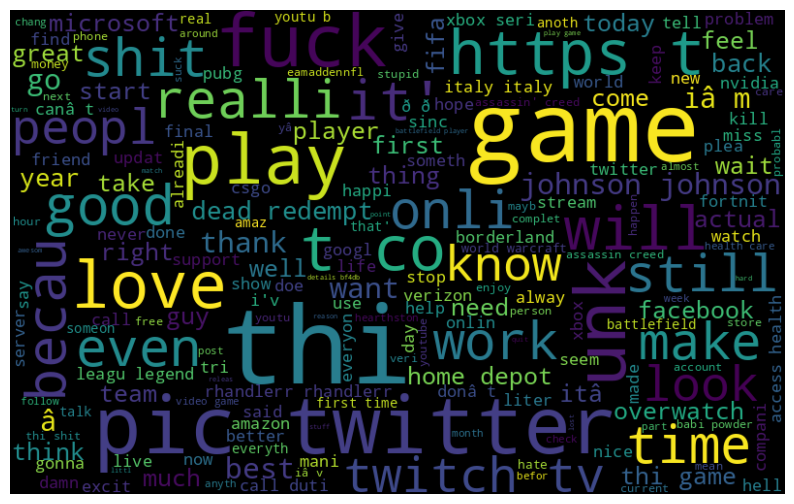

In [116]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Positive, Neutral, Negative, Irrelevant

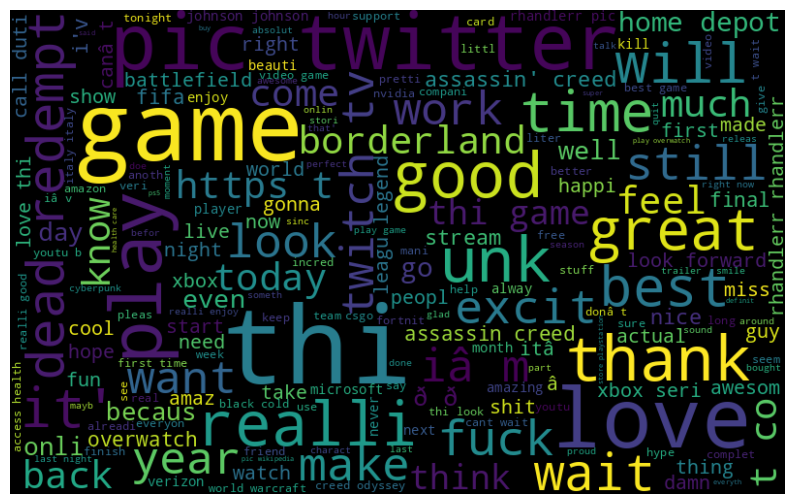

In [117]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 'Positive']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

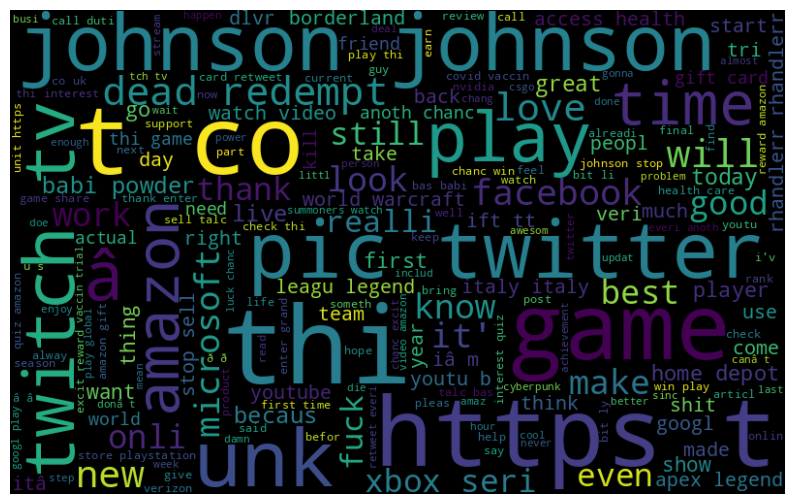

In [118]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 'Neutral']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

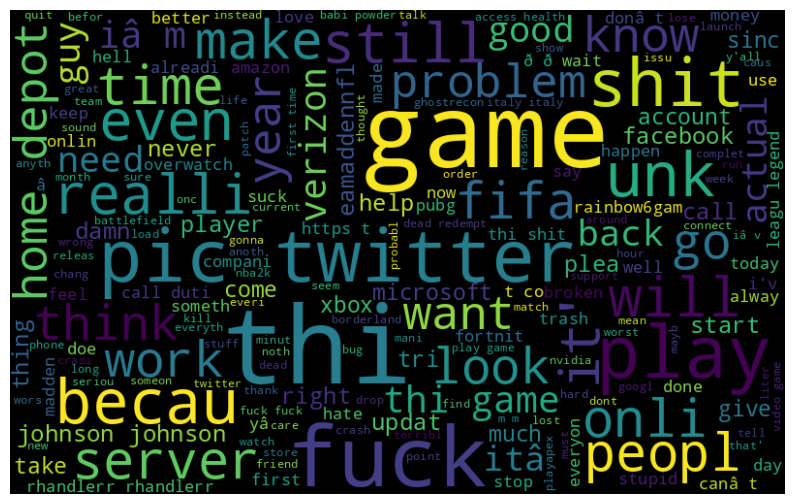

In [119]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 'Negative']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

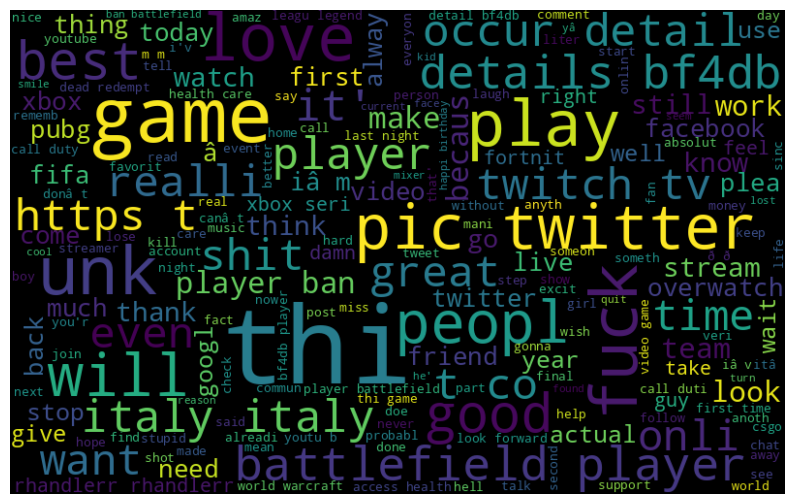

In [120]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 'Irrelevant']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Feature Extraction

## Bag-of-Words Features

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [123]:
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(74996, 1000)

## TF-IDF Features

In [124]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(74996, 1000)

## Word2Vec Features

### 1) Word2Vec Embedding

In [127]:
import multiprocessing

In [128]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

In [130]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=10,
            alpha=0.03,
            sample=6e-5,
            min_alpha=0.0007,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= cores - 1, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6925155, 16722340)

In [131]:
model_w2v.wv.most_similar(positive="dinner")

[('illustr', 0.4539493918418884),
 ('jake', 0.45191699266433716),
 ('govt.', 0.4326033890247345),
 ('chicken', 0.4324995279312134),
 ('saturday,', 0.4013306498527527),
 ('wore', 0.39491134881973267),
 ('robberi', 0.39381247758865356),
 ('podcast', 0.3823416233062744),
 ('attend', 0.37840306758880615),
 ('cure', 0.37517493963241577)]

In [132]:
model_w2v.wv.most_similar(positive="trump")

[('racist,', 0.48193711042404175),
 ('report:', 0.45775261521339417),
 ('hypocrit', 0.4550466537475586),
 ('donald', 0.44551682472229004),
 ('democraci', 0.43880724906921387),
 ('pentagon', 0.4312615394592285),
 ('at&t,', 0.43019187450408936),
 ('zuckerberg', 0.43005892634391785),
 ('exec', 0.4218296706676483),
 ('trump,', 0.41862332820892334)]

In [135]:
model_w2v.wv.most_similar(positive="fuck")

[('damn', 0.6074241399765015),
 ('shit', 0.5848134160041809),
 ('thi', 0.5319205522537231),
 ('what', 0.5255552530288696),
 ('like', 0.5161898732185364),
 ('your', 0.5063928961753845),
 ('be', 0.48413729667663574),
 ('just', 0.47989654541015625),
 ('realli', 0.4778773784637451),
 ('game', 0.4689238369464874)]

In [134]:
model_w2v.wv['food']


array([-0.33322707, -1.0538926 ,  0.7408352 , -0.36318225, -0.17474331,
        0.20813592, -0.21874185, -0.11124757, -0.0558765 ,  0.9502364 ,
        0.35607088, -0.38234565,  0.08035418, -0.5675625 , -0.55269706,
        0.7860862 , -0.42959553,  0.25874066,  0.2734222 , -0.14102669,
       -0.35680637, -0.11554932, -0.04948654,  0.35318774, -0.18631284,
       -0.20008413, -0.3997023 , -0.6472553 ,  0.2517483 , -0.9389129 ,
       -0.09061608, -0.17513639, -0.15688966, -0.73218554, -0.06490895,
       -0.26187384, -0.00857404, -0.2906161 , -0.59551173,  0.6609521 ,
       -0.723725  , -0.4391403 ,  0.42242718, -0.44927645, -0.2136673 ,
       -0.16021681, -0.34890944, -0.95856947,  0.37898353, -0.5774704 ,
        0.06703966, -0.12114664,  0.08325596, -0.56075555,  0.56253964,
        0.43621242, -0.4612393 , -0.36785185,  0.4835616 , -0.30807862,
       -0.3319349 , -0.02732564, -0.04058453, -0.22888418,  0.16439961,
       -0.38368565,  0.13393904, -0.04158471,  0.13852896,  0.13

#### Preparing Vectors for Tweets


Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [136]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [137]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays)

wordvec_df.shape

(74996, 200)

Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.



###2) Doc2Vec Embedding

In [139]:
#Let’s load the required libraries.
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument


In [140]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [141]:
#Let’s have a look at the result.
labeled_tweets[:6]

[TaggedDocument(words=['get', 'borderland', 'will', 'murder'], tags=['tweet_0']),
 TaggedDocument(words=['come', 'border', 'will', 'kill', 'all,'], tags=['tweet_1']),
 TaggedDocument(words=['get', 'borderland', 'will', 'kill', 'all,'], tags=['tweet_2']),
 TaggedDocument(words=['come', 'borderland', 'will', 'murder', 'all,'], tags=['tweet_3']),
 TaggedDocument(words=['get', 'borderland', 'will', 'murder', 'all,'], tags=['tweet_4']),
 TaggedDocument(words=['get', 'into', 'borderland', 'murder', 'all,'], tags=['tweet_5'])]

In [142]:
#Now let’s train a doc2vec model.
model_d2v = gensim.models.Doc2Vec(
    dm=1, # dm = 1 for ‘distributed memory’ model
    dm_mean=1, # dm = 1 for using mean of the context word vectors
    vector_size=200, # no. of desired features
    window=5, # width of the context window
    negative=7, # if > 0 then negative sampling will be used
    min_count=5, # Ignores all words with total frequency lower than 2.
    workers=3, # no. of cores
    alpha=0.1, # learning rate
    seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

100%|██████████| 74996/74996 [00:00<00:00, 2459332.64it/s]


In [145]:
#Preparing doc2vec Feature Set
docvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.dv[i].reshape((1,200))

docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(74996, 200)

In [ ]:
import time

# Modeling

## Logistic Regression

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

### Bag-of-Words Features

In [149]:
df_train.shape, df_test.shape

((73996, 4), (500, 4))

In [151]:
bow.shape

(74996, 1000)

In [156]:
df_train['sentiment'].unique()

array([1, 2, 3, 4])

In [155]:
# Mapping dictionary
mapping = {'Positive': 1, 'Neutral': 2, 'Negative': 3, 'Irrelevant': 4}

# Convert values to numbers
df_train['sentiment'] = df_train['sentiment'].map(mapping)

In [179]:
df_train.head(20)

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,1,im getting on borderlands and i will murder yo...
1,2401,Borderlands,1,I am coming to the borders and I will kill you...
2,2401,Borderlands,1,im getting on borderlands and i will kill you ...
3,2401,Borderlands,1,im coming on borderlands and i will murder you...
4,2401,Borderlands,1,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,1,im getting into borderlands and i can murder y...
6,2402,Borderlands,1,So I spent a few hours making something for fu...
7,2402,Borderlands,1,So I spent a couple of hours doing something f...
8,2402,Borderlands,1,So I spent a few hours doing something for fun...
9,2402,Borderlands,1,So I spent a few hours making something for fu...


In [177]:
df_train['sentiment']

0        1
1        1
2        1
3        1
4        1
        ..
74677    1
74678    1
74679    1
74680    1
74681    1
Name: sentiment, Length: 73996, dtype: int64

In [201]:
# Extracting train and test BoW features
train_bow = bow[:73996,:]
test_bow = bow[73996:73996+500, :]
valid_bow = bow[74496:,:]

lreg = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='lbfgs')
# training the model
lreg.fit(train_bow, df_train['sentiment'])
print(f"The Logistic Regression Model is: {lreg}")
predictions = lreg.predict(valid_bow)
print(f"The Predictions using Logistic Regression Model + Bag-Of-Words is: {predictions}")

The Logistic Regression Model is: LogisticRegression(max_iter=5000, multi_class='multinomial')
The Predictions using Logistic Regression Model + Bag-Of-Words is: [3 3 3 4 2 1 3 3 1 1 3 2 1 3 3 2 3 3 2 2 2 2 3 2 3 2 1 1 3 3 3 1 4 4 3 2 3
 2 2 3 2 2 1 3 3 1 1 1 3 3 2 4 3 2 4 3 2 3 3 2 1 3 1 3 1 3 3 2 3 1 3 1 3 4
 3 2 3 2 2 2 3 1 1 1 2 1 4 2 2 3 2 2 2 1 3 3 2 2 4 1 2 1 3 2 1 3 2 2 2 2 3
 2 1 1 2 3 4 1 2 3 4 2 1 3 1 3 1 3 3 3 3 3 1 3 2 3 4 1 1 3 1 2 3 3 4 2 2 1
 1 4 1 1 1 3 3 3 4 1 2 4 1 3 4 4 4 1 2 1 3 1 1 1 3 1 3 4 1 1 2 3 2 1 1 2 3
 2 3 3 2 3 4 3 3 1 2 3 1 3 3 2 2 1 3 1 1 1 3 2 1 2 2 3 3 3 2 1 2 3 4 2 1 1
 2 3 1 4 3 2 3 2 1 1 1 1 3 1 1 1 1 3 2 3 4 3 3 3 4 1 1 1 2 1 3 3 3 3 3 2 3
 3 1 2 1 2 1 3 2 1 3 4 2 1 3 3 2 4 2 4 1 3 3 2 2 1 3 2 2 3 1 3 2 4 3 1 2 3
 3 2 3 1 3 1 1 2 3 1 2 3 1 3 3 3 1 1 3 3 1 1 2 3 3 1 2 3 1 2 4 3 3 3 3 2 3
 1 3 1 3 2 1 3 4 2 3 3 3 3 3 4 4 3 3 3 2 2 1 4 2 2 4 1 3 2 1 2 2 3 1 1 3 1
 2 2 2 2 1 2 4 4 4 1 1 4 1 3 3 3 2 2 2 1 2 2 2 3 4 3 3 1 3 2 3 2 1 3 1 3 3
 4 1 3 1 1 2 

In [193]:
# Mapping dictionary
mapping = {'Positive': 1, 'Neutral': 2, 'Negative': 3, 'Irrelevant': 4}

# Convert values to numbers
df_test['sentiment'] = df_test['sentiment'].map(mapping)

In [195]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       500 non-null    int64 
 1   entity         500 non-null    object
 2   sentiment      500 non-null    int64 
 3   Tweet content  500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [202]:
test_bow.shape


(500, 1000)

In [221]:
# Extract the features from the test dataset
test_features = test_bow  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = lreg.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For Logistic Regression + Bag of Words:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For Logistic Regression + Bag of Words:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For Logistic Regression + Bag of Words:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For Logistic Regression + Bag of Words:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For Logistic Regression + Bag of Words:")
print(cm)

Accuracy For Logistic Regression + Bag of Words: 0.664
F1 Score For Logistic Regression + Bag of Words: 0.6524078679891127
Precision For Logistic Regression + Bag of Words: 0.6574111964929434
Recall For Logistic Regression + Bag of Words: 0.6507977744593578
Confusion Matrix For Logistic Regression + Bag of Words:
[[108  14  15  11]
 [ 12  89  19  14]
 [ 16  17  88   5]
 [ 16  10  19  47]]


In [214]:
# Convert values to numbers
df_valid['sentiment'] = df_valid['sentiment'].map(mapping)

In [215]:
df_valid.head()

,Tweet ID,entity,sentiment,Tweet content
0,5328,Hearthstone,3,@BlizzardCS whatâs going on with Hearthstone...
1,7618,MaddenNFL,3,@EAMaddenNFL is there a reason OFFLINE franchi...
2,7108,johnson&johnson,3,Johnson & Johnson is about to enter phase 3 tr...
3,10008,PlayerUnknownsBattlegrounds(PUBG),3,How is banning #PUBG going to fix anything? Al...
4,49,Amazon,2,I played this interesting quiz on Amazon - Try...


In [216]:
#Now let’s make predictions for the valid dataset and create a submission file.

df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

### TF-IDF Features

In [217]:
tfidf_train = tfidf[:73996,:]
tfidf_test = tfidf[73996:73996+500, :]
tfidf_valid = tfidf[74496:,:]

In [222]:
lreg = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='lbfgs')
# training the model
lreg.fit(tfidf_train, df_train['sentiment'])
print(f"The Logistic Regression Model is: {lreg}")
predictions = lreg.predict(tfidf_valid)
print(f"The Predictions using Logistic Regression Model + TF-IDF is: {predictions}")

The Logistic Regression Model is: LogisticRegression(max_iter=5000, multi_class='multinomial')
The Predictions using Logistic Regression Model + TF-IDF is: [3 3 3 4 2 1 3 3 1 1 3 2 1 3 3 4 3 3 3 2 2 2 3 2 3 2 1 1 3 3 3 1 3 1 3 2 3
 2 2 3 2 2 1 3 3 1 1 1 3 4 2 4 3 2 4 3 2 3 3 2 1 3 1 3 1 3 2 2 3 1 3 1 3 4
 3 2 3 2 2 3 1 1 1 3 3 1 4 2 2 3 2 2 2 1 3 1 2 2 4 3 2 1 3 2 1 3 2 2 2 2 3
 2 1 1 1 3 1 4 2 3 4 2 1 3 4 3 1 3 3 3 3 3 1 3 2 3 4 1 1 3 1 2 3 3 4 2 2 1
 1 1 1 1 1 3 3 3 2 1 2 4 1 3 4 4 4 1 2 1 3 1 1 1 3 1 3 4 1 2 2 3 2 1 1 2 3
 2 3 3 2 3 4 3 3 1 1 3 1 3 3 2 2 1 3 1 1 1 3 2 1 2 2 3 3 3 2 1 2 3 3 2 1 1
 2 4 1 3 3 2 3 2 1 1 2 1 2 1 1 1 1 3 2 3 4 3 3 3 4 1 1 1 2 2 3 3 3 3 3 2 3
 3 1 2 1 2 1 3 2 1 3 2 2 1 3 3 3 1 2 4 1 1 3 3 2 1 3 2 2 3 1 4 2 4 3 1 2 3
 3 2 3 1 3 2 2 2 3 1 2 3 1 4 3 3 1 1 3 3 1 1 2 3 3 1 2 3 1 2 4 3 3 3 3 2 3
 1 3 1 3 3 1 3 4 2 3 3 3 3 3 4 4 3 3 3 1 2 1 3 2 2 4 1 3 2 1 2 2 4 1 2 3 1
 2 2 2 2 1 2 4 4 4 1 1 4 1 3 3 3 2 2 2 2 1 2 2 3 4 3 3 1 3 2 3 2 1 3 1 3 3
 4 1 3 1 1 2 2 4 4 

In [220]:
# Extract the features from the test dataset
test_features = tfidf_test  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = lreg.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For Logistic Regression + TF-IDF:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For Logistic Regression + TF-IDF:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For Logistic Regression + TF-IDF:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For Logistic Regression + TF-IDF:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For Logistic Regression + TF-IDF:")
print(cm)

Accuracy For Logistic Regression + TF-IDF: 0.662
F1 Score For Logistic Regression + TF-IDF: 0.6508665866937551
Precision For Logistic Regression + TF-IDF: 0.6666689585837656
Recall For Logistic Regression + TF-IDF: 0.6489369050611751
Confusion Matrix For Logistic Regression + TF-IDF:
[[112  11  18   7]
 [ 17  78  29  10]
 [ 13  12  94   7]
 [ 16   8  21  47]]


In [223]:
#Now let’s make predictions for the valid dataset and create a submission file.

df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_lreg_tfidf.csv', index=False) # writing data to a CSV file

### Word2Vec Features

In [225]:
wordvec_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.122821,-0.107358,0.146870,0.121621,0.143190,0.048751,-0.162573,-0.062038,-0.034293,0.052660,...,0.201319,-0.061330,0.076020,-0.040790,-0.215142,-0.273236,-0.270587,-0.175853,0.061133,0.250279
1,0.213859,-0.358831,0.090939,0.239635,-0.030653,0.002601,-0.091060,-0.150141,0.098585,0.191025,...,0.501383,0.054445,-0.089818,0.013828,-0.222013,-0.192908,0.012525,-0.187280,-0.075150,0.588457
2,0.158005,-0.228821,0.082277,0.151791,0.081782,0.048484,-0.278779,-0.161396,0.011290,0.131028,...,0.345436,0.090460,-0.057707,-0.043160,-0.125639,0.003724,-0.046728,-0.179657,-0.078591,0.433504
3,0.273029,-0.282636,0.057283,0.238845,0.010642,0.001160,-0.135027,-0.093377,-0.083693,0.116189,...,0.443046,0.058127,-0.076324,0.093603,-0.228740,-0.317581,-0.059438,-0.166247,-0.137339,0.412217
4,0.285260,-0.205448,0.060845,0.138493,0.032927,0.025117,-0.274169,-0.081115,-0.061615,0.173006,...,0.384423,0.034669,-0.053667,0.020563,-0.161643,-0.258462,-0.129256,-0.186060,-0.064630,0.388820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74991,0.032896,-0.134747,0.119106,0.259646,0.113651,-0.175570,-0.075861,-0.074044,-0.162855,0.104821,...,0.215605,0.095953,0.165270,-0.234305,-0.149118,-0.094944,-0.027089,-0.221052,0.222160,0.428102
74992,0.040957,-0.111302,0.031579,0.057948,0.046241,-0.064761,-0.041526,0.045509,0.018309,0.020494,...,0.167535,0.053328,0.093648,-0.121396,0.040765,-0.072492,-0.102917,-0.107173,0.100113,0.153723
74993,-0.026423,-0.139422,0.083982,0.249441,-0.172172,0.186550,0.097076,-0.104175,0.014963,0.119662,...,0.333371,-0.088738,-0.007326,-0.061746,-0.370953,0.100103,-0.221305,-0.281119,0.005517,0.148417
74994,0.241348,-0.247017,0.329579,0.099561,0.029480,0.169747,-0.099761,-0.187594,-0.197718,-0.145974,...,0.201684,-0.235581,0.140079,0.049277,0.198024,-0.124501,0.113971,-0.182563,0.067803,0.218122


In [226]:
wordvec_df_train = wordvec_df.iloc[:73996,:]
wordvec_df_test = wordvec_df.iloc[73996:73996+500, :]
wordvec_df_valid = wordvec_df.iloc[74496:,:]

lreg = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='lbfgs')
# training the model
lreg.fit(wordvec_df_train, df_train['sentiment'])
print(f"The Logistic Regression Model is: {lreg}")
predictions = lreg.predict(wordvec_df_valid)
print(f"The Predictions using Logistic Regression Model + Word2Vec is: {predictions}")

The Logistic Regression Model is: LogisticRegression(max_iter=5000, multi_class='multinomial')
The Predictions using Logistic Regression Model + Word2Vec is: [3 3 2 3 2 1 3 4 1 1 3 2 1 3 3 4 3 3 2 2 2 2 3 2 3 2 1 1 3 3 3 4 3 4 2 1 3
 2 1 3 2 1 1 3 2 1 1 1 4 1 2 1 1 2 3 3 2 3 3 2 1 1 4 3 1 3 2 3 3 3 3 1 1 4
 3 1 3 2 2 1 2 1 3 1 2 3 3 1 2 3 3 2 2 1 4 1 2 2 2 3 2 1 3 2 4 1 1 4 4 2 3
 2 3 2 1 3 1 4 1 3 1 2 4 3 2 3 2 3 3 3 3 3 4 4 2 2 4 1 1 2 1 2 3 3 1 2 3 1
 1 1 4 3 3 3 3 3 2 1 3 4 1 3 1 4 1 1 2 1 3 1 2 1 2 1 3 4 1 2 2 2 2 4 2 1 3
 2 3 3 1 3 4 2 3 3 3 4 1 1 3 2 2 3 3 1 1 4 3 3 1 2 2 3 3 3 2 1 2 3 3 2 1 1
 2 1 1 4 2 4 1 2 4 1 2 2 2 3 1 1 1 3 2 3 3 3 3 3 3 1 1 2 2 2 3 3 3 3 3 3 3
 2 1 2 1 2 1 3 1 4 3 1 2 2 3 3 3 1 1 4 3 2 1 3 3 1 3 2 2 3 1 4 3 3 3 1 3 3
 3 2 3 2 3 2 2 2 3 1 2 3 1 2 1 3 1 1 1 3 1 1 2 3 2 2 1 3 1 3 1 3 3 3 3 2 3
 1 2 1 2 2 1 3 3 3 1 3 3 4 3 3 3 2 2 1 1 2 1 3 2 2 2 1 3 2 1 3 2 4 2 2 4 1
 2 2 2 3 3 2 4 4 1 1 3 3 2 3 3 3 2 3 2 1 2 2 2 3 2 3 3 1 3 2 3 1 1 1 1 3 3
 1 1 3 2 1 2 2 1 

In [227]:
# Extract the features from the test dataset
test_features = wordvec_df_test  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = lreg.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For Logistic Regression +  Word2Vec:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For Logistic Regression +  Word2Vec:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For Logistic Regression +  Word2Vec:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For Logistic Regression +  Word2Vec:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For Logistic Regression +  Word2Vec:")
print(cm)

Accuracy For Logistic Regression +  Word2Vec: 0.538
F1 Score For Logistic Regression +  Word2Vec: 0.5161207999367554
Precision For Logistic Regression +  Word2Vec: 0.5514172132267541
Recall For Logistic Regression +  Word2Vec: 0.5166025219156303
Confusion Matrix For Logistic Regression +  Word2Vec:
[[95 27 23  3]
 [22 69 35  8]
 [21 21 79  5]
 [26 19 21 26]]


In [228]:
#Now let’s make predictions for the valid dataset and create a submission file.

df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_lreg_wordvec.csv', index=False) # writing data to a CSV file

### Doc2Vec Features

In [230]:
docvec_df_train = docvec_df.iloc[:73996,:]
docvec_df_test = docvec_df.iloc[73996:73996+500, :]
docvec_df_valid = docvec_df.iloc[74496:,:]

lreg = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='lbfgs')
# training the model
lreg.fit(docvec_df_train, df_train['sentiment'])
print(f"The Logistic Regression Model is: {lreg}")
predictions = lreg.predict(docvec_df_valid)
print(f"The Predictions using Logistic Regression Model + Word2Vec is: {predictions}")

The Logistic Regression Model is: LogisticRegression(max_iter=5000, multi_class='multinomial')
The Predictions using Logistic Regression Model + Word2Vec is: [2 3 3 3 3 2 3 3 1 1 3 3 1 3 3 3 2 3 2 3 2 2 3 3 3 1 1 2 3 3 3 3 3 3 3 1 3
 2 2 3 2 3 3 3 3 1 1 1 2 1 2 4 3 2 3 3 3 1 3 3 1 1 2 1 1 3 1 3 1 3 3 1 3 1
 3 3 3 1 3 1 3 3 3 3 2 1 3 1 2 3 3 2 3 3 3 3 2 3 3 3 3 1 3 2 3 1 1 1 1 3 3
 3 3 2 3 3 1 3 1 1 3 3 2 3 2 3 1 3 3 3 4 4 2 2 2 3 4 4 1 1 2 3 3 3 1 2 1 3
 2 1 1 3 1 3 3 2 3 1 3 3 1 3 2 1 1 1 2 1 1 3 1 1 3 3 3 4 1 1 1 3 2 2 3 2 3
 2 2 2 3 3 4 3 2 1 1 2 1 1 3 3 3 3 3 1 1 2 3 2 1 2 2 3 3 3 3 1 2 2 3 1 1 1
 2 1 3 4 1 2 1 3 1 1 3 2 3 1 1 1 1 1 2 1 3 3 3 3 3 1 3 1 2 3 3 2 3 1 4 3 2
 3 3 3 1 2 3 1 1 2 4 1 2 3 1 3 3 1 1 1 1 3 3 3 2 1 3 1 3 3 1 3 2 4 1 1 3 3
 3 1 3 1 1 3 2 2 2 1 3 3 1 3 1 3 2 1 2 3 1 3 3 3 4 1 3 3 1 3 1 3 2 3 3 3 2
 4 3 1 3 3 1 3 3 3 3 3 3 3 3 3 4 1 3 1 3 3 1 3 3 1 1 3 3 2 1 2 3 2 3 1 3 3
 1 2 3 3 3 1 4 3 3 3 3 3 2 3 3 3 3 4 3 1 3 2 3 3 2 1 3 1 3 3 3 1 1 1 1 3 3
 1 1 3 1 1 2 1 4 

In [231]:
# Extract the features from the test dataset
test_features = docvec_df_test  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = lreg.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For Logistic Regression +  Doc2Vec:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For Logistic Regression +  Doc2Vec:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For Logistic Regression +  Doc2Vec:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For Logistic Regression +  Doc2Vec:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For Logistic Regression +  Doc2Vec:")
print(cm)

Accuracy For Logistic Regression +  Doc2Vec: 0.43
F1 Score For Logistic Regression +  Doc2Vec: 0.38519548273296866
Precision For Logistic Regression +  Doc2Vec: 0.4609594757503632
Recall For Logistic Regression +  Doc2Vec: 0.4075543920206477
Confusion Matrix For Logistic Regression +  Doc2Vec:
[[84 21 40  3]
 [35 32 62  5]
 [22 17 86  1]
 [32 15 32 13]]


In [232]:
#Now let’s make predictions for the valid dataset and create a submission file.

df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_lreg_docvec.csv', index=False) # writing data to a CSV file

## Naive Bayes Multinomial Classifier

### Bag-of-Words Features

In [233]:
from sklearn.naive_bayes import MultinomialNB

In [234]:
# Extracting train and test BoW features
train_bow = bow[:73996,:]
test_bow = bow[73996:73996+500, :]
valid_bow = bow[74496:,:]
model1_nb = MultinomialNB()
model1_nb.fit(train_bow, df_train['sentiment'])

predictions = model1_nb.predict(valid_bow)
print(f"The Predictions using Naive Bayes Model + Bag-Of-Words is: {predictions}")

The Predictions using Naive Bayes Model + Bag-Of-Words is: [3 3 2 4 2 1 3 4 1 1 3 2 1 3 3 4 3 3 2 2 2 2 3 2 3 2 1 1 3 3 3 1 3 4 1 2 3
 2 1 4 2 2 1 3 3 1 1 1 3 3 2 4 3 2 3 3 2 3 3 2 1 3 1 3 1 3 3 2 4 3 3 1 3 4
 3 1 3 2 2 1 1 1 1 1 3 1 3 1 2 3 4 2 2 1 3 1 2 2 4 3 2 1 3 2 1 1 1 4 2 1 3
 2 3 2 1 3 1 1 2 3 4 2 4 3 4 3 1 1 3 3 3 3 1 3 2 3 3 1 1 1 1 2 3 3 4 2 2 1
 1 1 1 1 3 3 3 3 2 1 3 4 1 3 1 4 4 1 2 1 3 1 4 1 2 1 3 4 1 2 2 3 2 1 1 2 3
 2 3 3 1 4 4 3 3 3 1 3 1 3 3 2 2 1 3 1 1 1 3 3 1 2 2 3 3 3 2 1 2 3 3 2 1 1
 2 1 1 3 1 3 3 2 1 1 1 1 2 1 1 1 1 3 2 3 4 3 3 3 4 1 1 1 1 2 3 2 3 3 3 2 3
 3 1 2 1 2 1 3 2 1 3 2 2 1 3 3 3 1 1 4 1 3 3 2 1 1 3 1 2 3 1 3 3 4 3 1 2 3
 3 2 3 1 3 1 2 4 3 1 2 3 1 3 3 3 1 1 2 3 4 1 2 3 2 1 2 3 1 3 1 3 3 3 3 2 3
 1 3 1 3 2 1 3 4 3 4 3 3 1 3 4 4 1 3 3 1 2 4 3 2 1 4 1 3 2 1 3 2 3 1 1 3 1
 2 1 3 4 3 2 4 4 1 1 1 3 2 3 3 3 2 3 2 2 1 2 2 3 1 3 3 1 3 2 3 2 1 2 1 3 3
 4 1 3 1 1 2 2 4 4 3 3 1 4 2 3 2 3 2 1 3 2 2 2 3 3 4 2 2 3 3 4 3 4 1 3 4 2
 3 2 3 2 3 2 2 3 1 2 1 1 3 2 1 4 2 2 4 3 

In [235]:
# Extract the features from the test dataset
test_features = test_bow  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = model1_nb.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For Naive Bayes +  BoW:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For Naive Bayes +  BoW:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For Naive Bayes +  BoW:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For Naive Bayes +  BoW:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For Naive Bayes +  BoW:")
print(cm)

Accuracy For Naive Bayes +  BoW: 0.604
F1 Score For Naive Bayes +  BoW: 0.58735486133716
Precision For Naive Bayes +  BoW: 0.599170288138409
Recall For Naive Bayes +  BoW: 0.5871017200105454
Confusion Matrix For Naive Bayes +  BoW:
[[107  13  21   7]
 [ 21  71  26  16]
 [ 17  18  86   5]
 [ 23  15  16  38]]


In [236]:
#Now let’s make predictions for the valid dataset and create a submission file.

df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_nb_bow.csv', index=False) # writing data to a CSV file

### TF-IDF Features

In [237]:
# Extracting train and test BoW features
train_tfidf = tfidf[:73996,:]
test_tfidf = tfidf[73996:73996+500, :]
valid_tfidf = tfidf[74496:,:]
model1_nb = MultinomialNB()
model1_nb.fit(train_tfidf, df_train['sentiment'])

predictions = model1_nb.predict(valid_tfidf)
print(f"The Predictions using Naive Bayes Model + TF-IDF is: {predictions}")

The Predictions using Naive Bayes Model + TF-IDF is: [3 3 2 3 2 1 3 3 1 1 3 2 1 3 3 2 3 3 2 2 2 2 3 2 3 2 1 1 3 3 3 1 3 1 1 2 3
 2 1 3 2 2 1 3 3 1 1 1 3 3 2 4 3 2 3 3 2 3 3 2 1 3 1 3 1 3 3 2 3 3 3 1 3 4
 3 1 3 2 2 3 1 1 1 1 3 1 3 1 2 3 4 2 2 1 3 1 2 2 1 3 2 1 3 2 1 1 1 2 3 2 3
 2 3 1 1 3 1 1 2 3 3 2 1 3 4 3 1 1 3 3 3 3 1 3 2 3 3 1 1 1 1 2 3 3 1 2 2 1
 1 1 1 1 3 3 3 3 2 1 2 4 1 3 1 3 2 1 2 1 3 1 1 1 2 1 3 4 1 2 2 3 2 1 1 2 3
 2 3 3 1 3 4 3 3 1 1 3 1 3 3 2 2 1 3 1 1 1 3 3 1 2 2 3 3 3 2 1 2 3 3 2 1 1
 2 1 1 3 1 3 3 2 1 1 1 1 2 1 1 1 1 3 2 3 3 3 3 3 4 1 1 1 1 2 3 2 3 3 3 3 3
 3 1 2 1 2 1 3 2 1 3 2 2 1 3 3 3 1 1 4 1 1 3 3 1 1 3 1 2 3 1 3 3 3 3 1 3 3
 3 2 3 1 3 1 2 2 3 1 2 3 1 3 3 3 1 1 2 3 1 1 2 3 2 1 2 3 1 3 1 3 3 3 3 2 3
 1 3 1 3 3 1 3 3 3 3 3 3 1 3 3 3 1 3 3 1 2 1 3 2 1 1 1 3 2 1 2 2 3 1 2 3 1
 2 1 3 4 3 2 4 4 1 1 1 3 3 3 3 3 2 3 2 1 1 2 2 3 1 3 3 1 3 2 3 2 1 2 1 3 3
 4 1 3 1 1 2 2 2 4 3 3 1 3 2 3 2 3 2 1 3 2 2 2 3 3 1 2 2 3 3 4 1 4 1 3 3 2
 3 2 3 2 3 2 2 3 1 2 3 1 3 2 3 1 2 2 1 3 2 1 1 

In [238]:
# Extract the features from the test dataset
test_features = test_tfidf  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = model1_nb.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For Naive Bayes +  TF-IDF:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For Naive Bayes +  TF-IDF:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For Naive Bayes +  TF-IDF:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For Naive Bayes +  TF-IDF:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For Naive Bayes +  TF-IDF:")
print(cm)

Accuracy For Naive Bayes +  TF-IDF: 0.62
F1 Score For Naive Bayes +  TF-IDF: 0.5958027488801345
Precision For Naive Bayes +  TF-IDF: 0.6392387558223391
Recall For Naive Bayes +  TF-IDF: 0.5962156476027338
Confusion Matrix For Naive Bayes +  TF-IDF:
[[115  13  17   3]
 [ 23  71  31   9]
 [ 18  16  92   0]
 [ 23  14  23  32]]


In [239]:
#Now let’s make predictions for the valid dataset and create a submission file.

df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_nb_tfidf.csv', index=False) # writing data to a CSV file

### Word2Vec Features

Challenge:

ValueError: Negative values in data passed to MultinomialNB (input X)

https://stackoverflow.com/a/34907803

In [240]:
# Extracting train and test BoW features
train_wordvec = wordvec_df.iloc[:73996,:]
test_wordvec = wordvec_df.iloc[73996:73996+500, :]
valid_wordvec = wordvec_df.iloc[74496:,:]
model1_nb = MultinomialNB()
model1_nb.fit(train_wordvec, df_train['sentiment'])

predictions = model1_nb.predict(valid_wordvec)
print(f"The Predictions using Naive Bayes Model + Word2Vec is: {predictions}")

ValueError: ignored

In [243]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
p = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
p.fit(train_wordvec, df_train['sentiment'])

predictions = p.predict(valid_wordvec)
print(f"The Predictions using Naive Bayes Model + Word2Vec is: {predictions}")

The Predictions using Naive Bayes Model + Word2Vec is: [3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

In [244]:
# Extract the features from the test dataset
test_features = test_wordvec  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = p.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For Naive Bayes + Word2Vec:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For Naive Bayes + Word2Vec:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For Naive Bayes + Word2Vec:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For Naive Bayes + Word2Vec:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For Naive Bayes + Word2Vec:")
print(cm)

Accuracy For Naive Bayes + Word2Vec: 0.272
F1 Score For Naive Bayes + Word2Vec: 0.13599560175929626
Precision For Naive Bayes + Word2Vec: 0.23644111570247933
Recall For Naive Bayes + Word2Vec: 0.2665969540969541
Confusion Matrix For Naive Bayes + Word2Vec:
[[ 11   0 137   0]
 [  1   0 133   0]
 [  1   0 125   0]
 [  3   0  89   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [245]:
#Now let’s make predictions for the valid dataset and create a submission file.

df_valid['predicted_sentiment'] = predictions
submission = df_valid[['Tweet ID', 'sentiment', 'predicted_sentiment']]
submission.to_csv('sub_nb_pipeline_wordvec.csv', index=False) # writing data to a CSV file

## SVM

In [246]:
from sklearn import svm


### Bag-of-Words Features

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(train_bow, df_train['sentiment'])
prediction = svc.predict(valid_bow)
print(f"The Predictions using SVM Model + Bag-Of-Words is: {predictions}")

In [ ]:
# Extract the features from the test dataset
test_features = test_bow  # Assuming test_bow is the feature representation of df_test

# Extract the true labels from the test dataset
test_labels = df_test['sentiment']

# Make predictions on the test set
test_predictions = svc.predict(test_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy For SVM +  BoW:", accuracy)

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='macro')
print("F1 Score For SVM +  BoW:", f1)

precision = precision_score(test_labels, test_predictions, average='macro')
print("Precision For SVM +  BoW:", precision)

recall = recall_score(test_labels, test_predictions, average='macro')
print("Recall For SVM +  BoW:", recall)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix For SVM +  BoW:")
print(cm)

### TF-IDF Features

### Word2Vec Features

### Doc2Vec Features

# Evaluations